In [1]:
%load_ext autoreload
%autoreload 2

In [9]:
from utils import *
from model import *
import matplotlib.pyplot as plt

In [3]:
# load all test data
x_test,y_test = load_pkl_data(test_pkl)
print("%d Validation Data loaded"%(len(x_test)))

1485 Validation Data loaded


In [4]:
# load label maps
label2ind = load_dict_from_json(label2ind_json)
ind2label = load_dict_from_json(ind2label_json)
print("Labels loaded")
nc = len(label2ind.keys())
print("Total %d classes"%nc)

Labels loaded
Total 3 classes


In [5]:
model = AttentionClassifier(nc)
print("Model created")

2023-03-22 12:40:16.345861: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-22 12:40:16.346376: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-22 12:40:16.347064: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-03-22 12:40:16.347346: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-03-22 12:40:16.347639: W tensorflow/c

Model created


In [6]:
model.load_model("model/")

Model restored weights from model/ckpt-15


2023-03-22 12:40:44.207009: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 15627264 exceeds 10% of free system memory.


In [121]:
# take a random data from test
n_test = len(x_test)
rand_idx = np.random.randint(0,n_test)
print("Random Index %d"%rand_idx)
test_tweet = x_test[rand_idx]
test_label = y_test[rand_idx]
print(test_tweet)
print("Label: %s"%test_label)

Random Index 771
When yall got the same baby mama and realize that bitch is the real enemy
Label: offensive_language


In [122]:
word_attention,label = model.predict_with_explain(test_tweet,ind2label)
print("Predicted label: %s"%label)
print("Word level attention")
for w in word_attention:
    print(w[0],w[1])

offensive_language
Predicted label: offensive_language
Word level attention
[CLS] 5.507649796844018e-14
when 2.9640886967108315e-11
yall 1.9336541774978564e-05
got 1.033024332741661e-07
the 2.101984364344389e-09
same 1.225608226018693e-10
baby 2.2236170682532475e-09
mama 5.635283287119819e-06
and 7.186811146198124e-10
realize 1.5544503462194825e-09
that 1.0151730975849205e-06
bitch 0.9997337460517883
is 0.00022318511037155986
the 1.6775158655946143e-05
real 1.8417547664739686e-07
enemy 3.333708309405381e-11
[SEP] 7.728314654897872e-10


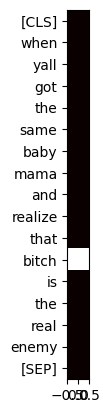

In [123]:
scores = []
words = []
for w,a in word_attention:
    scores.append(a)
    words.append(w)
# scores = np.log(scores)
plt.imshow(np.expand_dims(scores,1),cmap='hot')
plt.yticks(range(len(words)),words,rotation=0)
plt.show()

In [15]:
decoded = model.encoder_layer.preprocess_layer.decode(tf.squeeze(words,-1)) 
print(decoded)

[CLS] angelis yep which is messier more dangerous more environmentally unfriendly than their retarded new spouts [SEP]


In [34]:
sub_word_ids = model.encoder_layer.preprocess_layer.encode(test_tweet)
sub_word_dict = {}
for i,sw in enumerate(sub_word_ids):
    sub_word_dict[i] = sw
# print(sub_word_dict)
word_spans = []
subword_list = []
for k in sub_word_dict.keys():
    sid = sub_word_dict[k]
    sub_word = model.encoder_layer.preprocess_layer.convert_ids_to_tokens(sid)
    if "##" in sub_word:
        word_spans[-1].append(k)
        subword_list[-1].append(sub_word)
    else:
        word_spans.append([k])
        subword_list.append([sub_word])
    # print(k,sid,sub_word)
for i,s in zip(word_spans,subword_list):
    print(i,s)
# all_spans = []
# for id_ in word_ids:
#     sub_word = model.encoder_layer.preprocess_layer.convert_ids_to_tokens(id_)
#     if "##" in sub_word:
#         all_spans[-1].append(id_)
#     else:
#         all_spans.append([id_])
#     # print(id_,sub_word)
# word_span = {}
# for i,sp in enumerate(all_spans):
#     sub_list = []
#     sub_idx = []
#     for s in sp:
#         sub_word = model.encoder_layer.preprocess_layer.convert_ids_to_tokens(s)
#         sub_list.append(sub_word.replace("##",""))
#         sub_idx.append(s)
#     wd = ''.join(sub_list)
#     word_span[str(i)] = {"word":wd,"subword_index":sub_idx}
# print(word_span)


[0] ['[CLS]']
[1, 2] ['angel', '##is']
[3] ['yep']
[4] ['which']
[5] ['is']
[6, 7] ['mess', '##ier']
[8] ['more']
[9] ['dangerous']
[10] ['more']
[11] ['environmentally']
[12, 13, 14, 15] ['un', '##fr', '##ien', '##dly']
[16] ['than']
[17] ['their']
[18, 19, 20] ['re', '##tar', '##ded']
[21] ['new']
[22, 23] ['sp', '##outs']
[24] ['[SEP]']
